<a href="https://colab.research.google.com/github/emtoAy/Personal-Project/blob/main/D%E1%BB%B1_%C4%91o%C3%A1n_r%E1%BB%A7i_ro_t%C3%ADn_d%E1%BB%A5ng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. IMPORT LIB


In [ ]:
import pandas as pd
from IPython.display import display

# Load Data

In [ ]:
link = "https://drive.google.com/file/d/1uqYOeBlbTeAbZecotY_2ZOdAYs1-IIvS/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]
df = pd.read_csv(path)
display(df.head(5))

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# II. REVIEW EDA


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

In [ ]:
display(df.describe())
display(df.describe(exclude = [int, float]))

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


## Univariate Analysis
### Hypothesis (Giả thuyết): Số lượng khách vi phạm thấp hơn số lượng khách không vi phạm

[Text(0, 0, '25473'), Text(0, 0, '7108')]

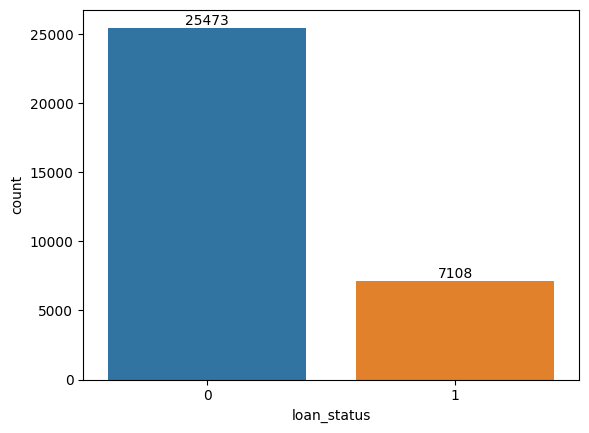

In [ ]:
import seaborn as sns
ax = sns.countplot(x = 'loan_status',data = df)
ax.bar_label(ax.containers[0])

[Text(0, 0, '5745'), Text(0, 0, '26836')]

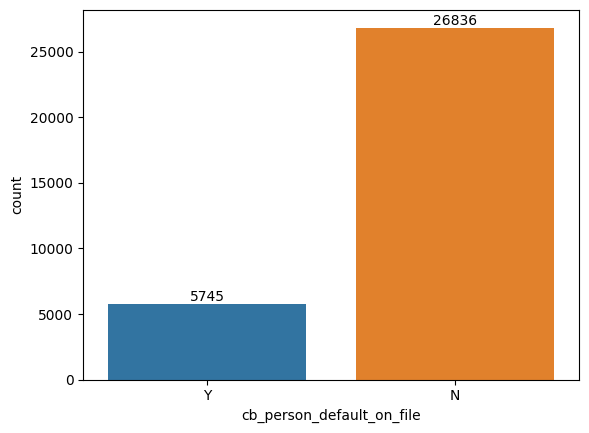

In [ ]:
ax = sns.countplot(x = 'cb_person_default_on_file',data = df)
ax.bar_label(ax.containers[0])

## Phân tích mối liên quan giữa biến (Correlation)

<ipython-input-7-3dcc21f9cc19>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax =.8, square = True, annot = True )


Text(0.5, 1.0, 'Confusion Matrix')

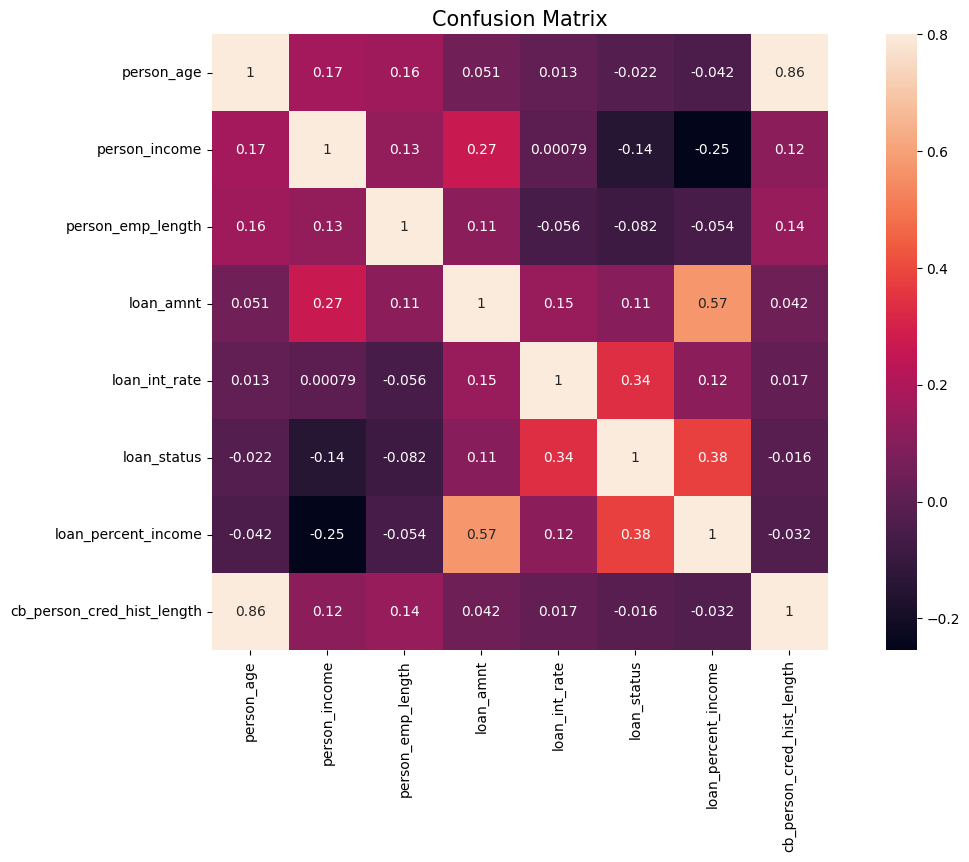

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(df.corr(), vmax =.8, square = True, annot = True )
plt.title('Confusion Matrix',fontsize=15)

## Phân bố tuổi

In [ ]:
max_ = df['person_age'].max()
min_ = df['person_age'].min()
print(f"maximum Age {max_}")
print(f"minimum Age {min_}")

# Các nhóm tuổi:
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')

age_group([0 ,18, 30, 40, 50, 60, 70, 80, 90, 100, 200])

maximum Age 144
minimum Age 20
Age between 1 and 18: Number of people 0
Age between 19 and 30: Number of people 24824
Age between 31 and 40: Number of people 6263
Age between 41 and 50: Number of people 1206
Age between 51 and 60: Number of people 218
Age between 61 and 70: Number of people 57
Age between 71 and 80: Number of people 6
Age between 81 and 90: Number of people 1
Age between 91 and 100: Number of people 1
Age between 101 and 200: Number of people 5


##Phân bố thu nhập

In [ ]:
max_ = df['person_income'].max()
min_ = df['person_income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

#Các nhóm thu nhập
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')

income_group([0, 25000, 50000, 75000, 100000, 6000000])

maximum Income 6000000
minimum Income 4000
Income between 1 and 25000: Number of people 2469
Income between 25001 and 50000: Number of people 11613
Income between 50001 and 75000: Number of people 9622
Income between 75001 and 100000: Number of people 4670
Income between 100001 and 6000000: Number of people 4207


## Phân bố số vay

In [ ]:
max_loan_amount = df['loan_amnt'].max()
min_loan_amount = df['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")


def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')

loan_amount_group([0, 5000, 10000, 15000, 35000])

maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 9489
Loan Amount between 5001 and 10000: Number of people 12040
Loan Amount between 10001 and 15000: Number of people 6123
Loan Amount between 15001 and 35000: Number of people 4929


## Biểu đồ tròn thể hiện hình thức nhà ở

In [ ]:
import plotly.express as px
level_counts=df.person_home_ownership.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'person_home_ownership'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

## Biểu đồ tròn thể hiện điểm tín dụng

In [ ]:
level_counts=df.loan_grade.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'loan_grade'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

## Biểu đồ mục đích vay

In [ ]:
fig=px.histogram(df, x = 'loan_intent',histnorm = 'percent', text_auto = '.2f',template = 'presentation', title = 'loan intent',color_discrete_sequence=px.colors.sequential.Mint)
fig.update_layout()
fig.show()

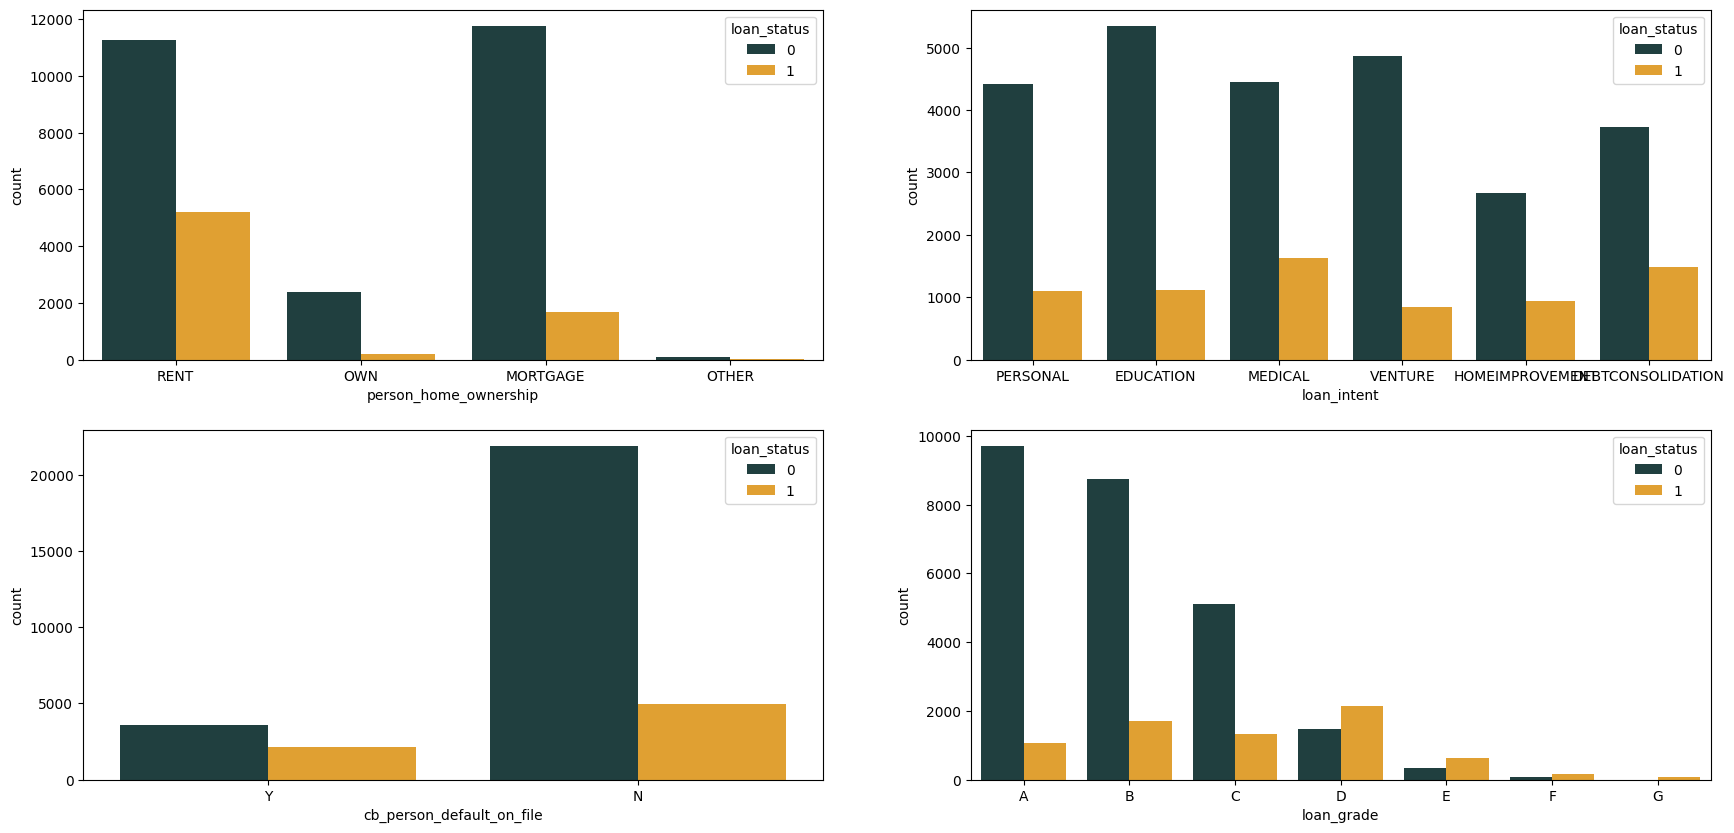

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = ["#1b4444", "#fda715"]

fig, axes = plt.subplots(2, 2, figsize=(21, 10))

sns.countplot(x='person_home_ownership', hue='loan_status', data=df, ax=axes[0, 0], palette=custom_palette)

df['loan_grade'] = pd.Categorical(df['loan_grade'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=True)
sns.countplot(x='loan_grade', hue='loan_status', data=df, ax=axes[1, 1], palette=custom_palette)

sns.countplot(x='loan_intent', hue='loan_status', data=df, ax=axes[0, 1], palette=custom_palette)

sns.countplot(x='cb_person_default_on_file', hue='loan_status', data=df, ax=axes[1, 0], palette=custom_palette)

plt.show()

# III. Preprocessing

[Text(0, 0, '25473'), Text(0, 0, '7108')]

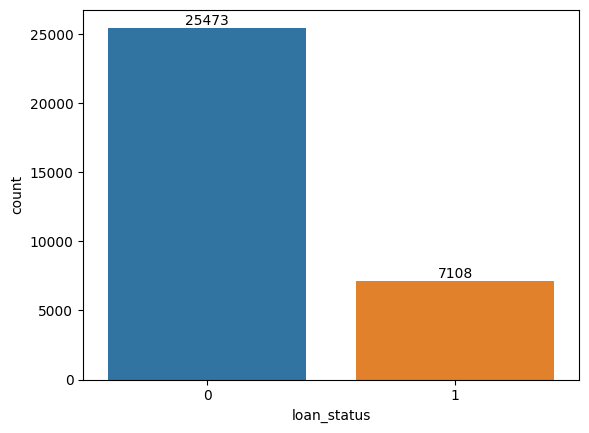

In [ ]:
import seaborn as sns
ax = sns.countplot(x = 'loan_status',data = df)
ax.bar_label(ax.containers[0])

In [ ]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
91//2

## Xóa null

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Xóa dữ liệu sai

In [ ]:
df[df['person_age'] >= 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [ ]:
df.drop(df[df['person_age'] >= 100].index, inplace=True)

In [ ]:
df[df['person_emp_length'] >= 70]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [ ]:
df.drop(df[df['person_emp_length'] >= 70].index, inplace=True)

## ENCODING

In [ ]:
display(df.describe())
display(df.describe(exclude = [int, float]))

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28632.000000,2.863200e+04,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000
mean,27.712140,6.642651e+04,4.780316,9655.331447,11.039701,0.216611,0.169489,5.793553
std,6.171989,5.154746e+04,4.035616,6327.798706,3.229409,0.411942,0.106361,4.037133
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,28632,28632,28632,28632
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,14548,5702,9401,23530


In [ ]:
#Ordinal Encoding
df["cb_person_default_on_file"].replace(['N' ,'Y'], [0,1], inplace = True)
# Dùng thư viện one hot encoding
df = pd.get_dummies(df)
display(df.head(3))

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0,...,0,0,0,0,1,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,1,...,1,0,0,0,0,1,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28632 entries, 1 to 32580
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      28632 non-null  int64  
 1   person_income                   28632 non-null  int64  
 2   person_emp_length               28632 non-null  float64
 3   loan_amnt                       28632 non-null  int64  
 4   loan_int_rate                   28632 non-null  float64
 5   loan_status                     28632 non-null  int64  
 6   loan_percent_income             28632 non-null  float64
 7   cb_person_default_on_file       28632 non-null  int64  
 8   cb_person_cred_hist_length      28632 non-null  int64  
 9   person_home_ownership_MORTGAGE  28632 non-null  uint8  
 10  person_home_ownership_OTHER     28632 non-null  uint8  
 11  person_home_ownership_OWN       28632 non-null  uint8  
 12  person_home_ownership_RENT      

[Text(0, 0, '22430'), Text(0, 0, '6202')]

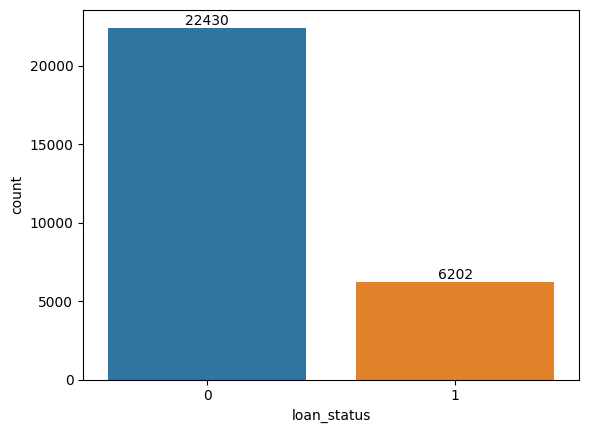

In [ ]:
import seaborn as sns
ax = sns.countplot(x = 'loan_status',data = df)
ax.bar_label(ax.containers[0])

#IV. TRAIN TEST SPLIT

In [ ]:
X = df.drop(columns = ["loan_status"])
y = df["loan_status"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(22905, 25) (5727, 25)


## Oversampling


In [ ]:
from imblearn.over_sampling import SMOTE

# Tạo một đối tượng SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Áp dụng SMOTE lên tập huấn luyện
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# In kích thước của tập huấn luyện sau oversampling
print(X_train_resampled.shape, y_train_resampled.shape)

(35884, 25) (35884,)


## Scale Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

X_test_scaled = scaler.transform(X_test)

#V. Train Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# các mô hình
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier()
}

# Lặp qua từng mô hình
for model_name, model in models.items():
    model.fit(X_train_resampled_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)

    # classification report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # confusion matrix
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # AUC
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"{model_name} AUC: {auc}")

    print("\n")



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4488
           1       0.76      0.58      0.65      1239

    accuracy                           0.87      5727
   macro avg       0.82      0.76      0.79      5727
weighted avg       0.86      0.87      0.86      5727

Logistic Regression Confusion Matrix:
[[4260  228]
 [ 525  714]]
Logistic Regression AUC: 0.869364669339744


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      4488
           1       0.70      0.77      0.74      1239

    accuracy                           0.88      5727
   macro avg       0.82      0.84      0.83      5727
weighted avg       0.89      0.88      0.88      5727

Decision Tree Confusion Matrix:
[[4084  404]
 [ 281  958]]
Decision Tree AUC: 0.8415931858105338


KNN Classification Report:
              precision    rec

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# các mô hình
models = {
    "AdaBoost": AdaBoostClassifier(),
    "LightGBM": LGBMClassifier(),
    "XGBoost": XGBClassifier(),
    "SVC": SVC(probability=True)  # SVC cần probability=True để tính AUC
}

# Lặp qua từng mô hình
for model_name, model in models.items():
    model.fit(X_train_resampled_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)

    # classification report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # confusion matrix
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # AUC
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"{model_name} AUC: {auc}")

    print("\n")


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      4488
           1       0.73      0.70      0.72      1239

    accuracy                           0.88      5727
   macro avg       0.83      0.82      0.82      5727
weighted avg       0.88      0.88      0.88      5727

AdaBoost Confusion Matrix:
[[4173  315]
 [ 368  871]]
AdaBoost AUC: 0.8895603952931969


[LightGBM] [Info] Number of positive: 17942, number of negative: 17942
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1391
[LightGBM] [Info] Number of data points in the train set: 35884, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classification Report:
              pre